# ESA Risk List's asteroids Impact Velocity vs Impact Probability plot
Written by Jackey Fang<br>
<br>
**Last Update**<br>
2026-02-22

# Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.table import QTable, vstack

# V imp vs IP

In [12]:
esa_sum = QTable.read('data/esa_ipcum.ecsv', format='ascii.ecsv')

In [13]:
def plot_vimp_ip(table, vimp_col='vel_km_s', ip_col='ip_cum'):
    # Extract data
    v_imp = np.array(table[vimp_col], dtype=float)
    ip = np.array(table[ip_col], dtype=float)
    
    clean_mask = np.isfinite(v_imp) & np.isfinite(ip) & (ip > 0)
    v_imp = v_imp[clean_mask]
    ip = ip[clean_mask]

    # Round V_imp to group by every 1 km/s
    bin_size = 1
    v_imp_binned = np.round(v_imp / bin_size) * bin_size

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.set_style('whitegrid')

    sns.lineplot(
        x = v_imp_binned,
        y = ip,
        estimator = np.median,
        errorbar = ('pi', 100),
        color = 'green',
        linewidth = 2,
        ax = ax,
        label = 'Median IP'
    )

    ax.set_yscale('log')
    ax.invert_xaxis()

    ax.set_title(r"ESA Impact Probability vs. $V_{imp}$")
    ax.set_ylabel("Cumulative Impact Probability (log)")
    ax.set_xlabel("$V_{immp}$ (km/s)")
    ax.legend();

    plt.show()

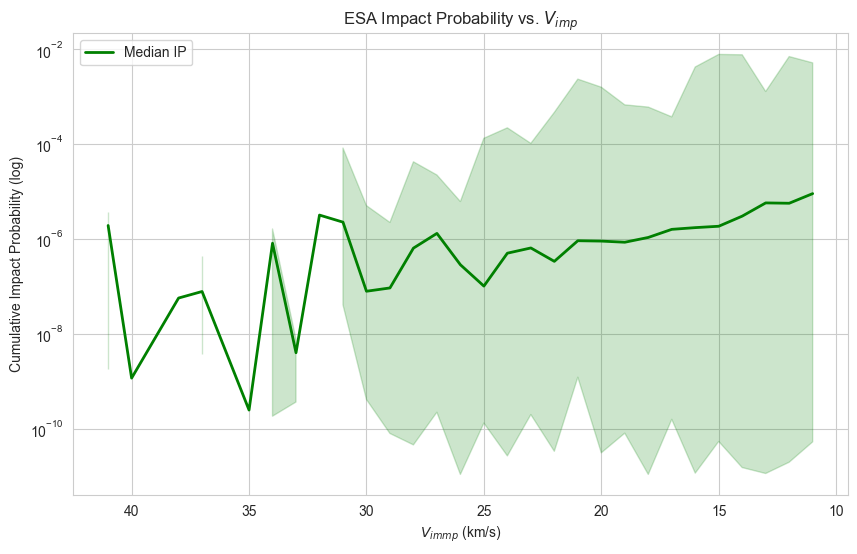

In [14]:
plot_vimp_ip(esa_sum)